In [1]:
#Import the package
import pandas as pd
from pandas import DataFrame
import numpy as np

## Data Processing

In [2]:
path = '/Users/rosie/Desktop/UMD/Data_Processing_and_Analysis_in_Python/Global Terrorism/project/'
df = pd.read_csv(path + 'globalterrorismdb_0718dist.csv', delimiter = ',', encoding= 'latin-1', low_memory=False)

In [3]:
df.shape

(181691, 135)

In [3]:
#Load 1993 dataset
df_1993=pd.read_excel(path + 'gtd1993_0718dist.xlsx')

In [4]:
#Concatenate the 2 parts of data together
df = pd.concat([df,df_1993],axis=0, ignore_index=True)

In [6]:
df = df.sort_values(['iyear']).reset_index(drop = True)
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
182433,201712060017,2017,12,6,NaN,0,NaN,228,Yemen,10,...,NaN,"""Yemen rebels disperse protests demanding slai...","""Houthis commit atrocities against Yemeni wome...","""Sana'a: Houthis attack women's demonstration...",START Primary Collection,0,0,0,0,NaN
182434,201712060018,2017,12,6,NaN,0,NaN,205,Thailand,5,...,NaN,"""Roadside bomb slightly injures five in Narath...","""Govt to resell separatists' seized property,""...",NaN,START Primary Collection,-9,-9,0,-9,NaN
182435,201712070005,2017,12,7,NaN,0,NaN,229,Democratic Republic of the Congo,11,...,Casualty numbers conflict across sources. Foll...,"""15th UN peacekeeper dies of wounds from Congo...","""The Latest: UN says Congo base reoccupied aft...","""14 UN peacekeepers killed, 53 hurt in Congo a...",START Primary Collection,0,1,1,1,NaN
182436,201712070004,2017,12,7,NaN,0,NaN,95,Iraq,10,...,NaN,"""Four Islamic State militants arrested in west...","""Iraq: Security Roundup 1900 GMT 7 December 20...",NaN,START Primary Collection,-9,-9,0,-9,NaN
182437,201703280029,2017,3,28,NaN,0,NaN,130,Mexico,1,...,NaN,"""Around the world,"" Arizona Daily Star (Tucson...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
# The shape of after combining 1993 data with original dataset
df.shape

(182438, 135)

In [8]:
#Sort the dataset by index
df['iyear'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1993      747
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: iyear, dtype: int64

#### 1. Define Functions

In [10]:
# Define a function to check whether there's same value in different variables, if same assign null
def sameCheck(df, same_list):
    for j in range(len(same_list)):
        for i in range(len(df)):
            if j < len(same_list)-1:
                if df[same_list[j]].iloc[i] == df[same_list[j+1]].iloc[i]:
                    df[same_list[j+1]].iloc[i] = np.nan
            else:
                if df[same_list[j]].iloc[i] == df[same_list[0]].iloc[i]:
                    df[same_list[j]].iloc[i] = np.nan

In [11]:
#Define a function to create new binary variable
def binaryVariable(df, var_list, name):
    num = len(var_list)
    if num <= 3:
        df[name] = np.where(df[var_list[1]].notnull() == True, 1, np.where(df[var_list[1]].isnull() & df[var_list[2]].notnull() == True, 1, 0))
    if num > 3:
        df[name] = np.where(df[var_list[1]].notnull() == True, 1, 
                                 np.where(df[var_list[1]].isnull() & df[var_list[2]].notnull() == True, 1, 
                                          np.where(df[var_list[1]].isnull() & df[var_list[3]].notnull() == True, 1,0)))


In [12]:
#Define a function to count the variable
def countVariable(df, var_list, name):
    num = len(var_list)
    if num <= 3:
        df[name] = np.where(df[var_list[0]].notnull() == True, 1, 0) + np.where(df[var_list[1]].notnull() == True, 1, 0) + np.where(df[var_list[2]].notnull() == True, 1, 0)
    if num > 3:
        df[name] = np.where(df[var_list[0]].notnull() == True, 1, 0) + np.where(df[var_list[1]].notnull() == True, 1, 0) + np.where(df[var_list[2]].notnull() == True, 1, 0) + np.where(df[var_list[3]].notnull() == True, 1, 0)
    

#### 2. Deal with Attacktype, Targettype, Target, Corp, Nationaliy, Perpetrator, WeaponType and Casualties Variables

* a. Deal with AttackType Variables

In [13]:
# Define the variables used
attacktype_list = ['attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt']
attack_list = ['attacktype1','attacktype2','attacktype3']

In [14]:
# Filter out the attacktype from the original dataframe
df_attack = df.filter(regex = '\w*attacktype[1-3]_txt')
df_attack.head()

,attacktype1_txt,attacktype2_txt,attacktype3_txt
0,Assassination,NaN,NaN
1,Assassination,NaN,NaN
2,Bombing/Explosion,NaN,NaN
3,Facility/Infrastructure Attack,NaN,NaN
4,Armed Assault,NaN,NaN


In [16]:
# Check is there same value in different attacktype, if same, we'll process the same value to null.
pd.options.mode.chained_assignment = None
sameCheck(df_attack, attacktype_list)

In [18]:
# Create new binary variable 'multiattacktype' for further modeling.
binaryVariable(df_attack, attacktype_list, 'multiattacktype' )
df_attack['multiattacktype'].value_counts()

0    176102
1      6336
Name: multiattacktype, dtype: int64

In [19]:
# Create new numeric count variable 'attacktype_count'.
countVariable(df_attack, attacktype_list, 'attacktype_count')
df_attack['attacktype_count'].value_counts()

1    176102
2      5934
3       402
Name: attacktype_count, dtype: int64

In [20]:
# Combine attacktype into 1 column with separater '|'
df_attack['attacktype'] = df_attack[df_attack.columns[0:3]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [21]:
df_attack.head(25)

,attacktype1_txt,attacktype2_txt,attacktype3_txt,multiattacktype,attacktype_count,attacktype
0,Assassination,NaN,NaN,0,1,Assassination
1,Assassination,NaN,NaN,0,1,Assassination
2,Bombing/Explosion,NaN,NaN,0,1,Bombing/Explosion
3,Facility/Infrastructure Attack,NaN,NaN,0,1,Facility/Infrastructure Attack
4,Armed Assault,NaN,NaN,0,1,Armed Assault
5,Assassination,NaN,NaN,0,1,Assassination
6,Bombing/Explosion,NaN,NaN,0,1,Bombing/Explosion
7,Facility/Infrastructure Attack,NaN,NaN,0,1,Facility/Infrastructure Attack
8,Hostage Taking (Kidnapping),NaN,NaN,0,1,Hostage Taking (Kidnapping)
9,Facility/Infrastructure Attack,NaN,NaN,0,1,Facility/Infrastructure Attack


In [23]:
# Take out the processed column "attacktype".
dfatt_new = df_attack.iloc[:,-1]
dfatt_new.head()

0                     Assassination
1                     Assassination
2                 Bombing/Explosion
3    Facility/Infrastructure Attack
4                     Armed Assault
Name: attacktype, dtype: object

* b.Targettype and Targetsubtype Variables

In [24]:
targettypetxt_list = ["targtype1_txt", 'targtype2_txt', "targtype3_txt"]
targetsubtypetxt_list = ['targsubtype1_txt', 'targsubtype2_txt', 'targsubtype3_txt']
targtype_list = ['targtype1','targtype2','targtype3']
targsubtype_list = ['targsubtype1','targsubtype2','targsubtype3']

In [25]:
dft = df.filter(regex = 'targ\w*type').drop(targtype_list + targsubtype_list, axis = 1)
dft.head()

,targtype1_txt,targsubtype1_txt,targtype2_txt,targsubtype2_txt,targtype3_txt,targsubtype3_txt
0,Private Citizens & Property,Named Civilian,NaN,NaN,NaN,NaN
1,Journalists & Media,Radio Journalist/Staff/Facility,NaN,NaN,NaN,NaN
2,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN
3,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN
4,Police,"Police Building (headquarters, station, school)",NaN,NaN,NaN,NaN


In [26]:
pd.options.mode.chained_assignment = None
# Check is there same value in different targettype, if same, we'll process the same value to null.
sameCheck(dft,targettypetxt_list)
# Check is there same value in different targetsubtype, if same, we'll process the same value to null.
sameCheck(dft,targetsubtypetxt_list)

In [30]:
# Create new binary variable 'multitargtype' for further modeling.
binaryVariable(dft, targettypetxt_list, 'multitargtype')
dft['multitargtype'].value_counts()

0    173100
1      9338
Name: multitargtype, dtype: int64

In [31]:
# Create new numeric count variable 'targtype_count'.
countVariable(dft, targettypetxt_list, 'targtype_count')
dft['targtype_count'].value_counts()

1    173100
2      8695
3       643
Name: targtype_count, dtype: int64

In [32]:
# Create new binary variable 'multitargsubtype' for further modeling.
binaryVariable(dft, targetsubtypetxt_list, 'multitargsubtype')
dft['multitargsubtype'].value_counts()

0    172729
1      9709
Name: multitargsubtype, dtype: int64

In [33]:
# Create new numeric count variable 'targsubtype_count'.
countVariable(dft, targetsubtypetxt_list, 'targsubtype_count')
dft['targsubtype_count'].value_counts()

1    162052
0     10887
2      8766
3       733
Name: targsubtype_count, dtype: int64

In [34]:
# combine targettype and targetsubtype into 1 column
dft['targettype']=dft[dft.columns[0:6]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [35]:
dft.head()

,targtype1_txt,targsubtype1_txt,targtype2_txt,targsubtype2_txt,targtype3_txt,targsubtype3_txt,multitargtype,targtype_count,multitargsubtype,targsubtype_count,targettype
0,Private Citizens & Property,Named Civilian,NaN,NaN,NaN,NaN,0,1,0,1,Private Citizens & Property|Named Civilian
1,Journalists & Media,Radio Journalist/Staff/Facility,NaN,NaN,NaN,NaN,0,1,0,1,Journalists & Media|Radio Journalist/Staff/Fac...
2,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN,0,1,0,1,Government (Diplomatic)|Embassy/Consulate
3,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN,0,1,0,1,Government (Diplomatic)|Embassy/Consulate
4,Police,"Police Building (headquarters, station, school)",NaN,NaN,NaN,NaN,0,1,0,1,"Police|Police Building (headquarters, station,..."


In [37]:
# Take out the processed column "targettype".
dft_new = dft.iloc[:,-1]
dft_new.head()

0           Private Citizens & Property|Named Civilian
1    Journalists & Media|Radio Journalist/Staff/Fac...
2            Government (Diplomatic)|Embassy/Consulate
3            Government (Diplomatic)|Embassy/Consulate
4    Police|Police Building (headquarters, station,...
Name: targettype, dtype: object

* c. Target: detailed victim information

In [38]:
target_list = ['target1', 'target2', 'target3']

In [39]:
target=df.filter(regex = 'target')
target.head()

,target1,target2,target3
0,Julio Guzman,NaN,NaN
1,Employee,NaN,NaN
2,U.S. Embassy,NaN,NaN
3,U.S. Consulate,NaN,NaN
4,Cairo Police Headquarters,NaN,NaN


In [40]:
pd.options.mode.chained_assignment = None
# Check is there same value in different targettype, if same, we'll process the same value to null.
sameCheck(target, target_list)

In [42]:
# Create new binary variable 'multitarget' for further modeling.
binaryVariable(target, target_list, 'multitarget')
target['multitarget'].value_counts()

0    172163
1     10275
Name: multitarget, dtype: int64

In [43]:
# Create new numeric count variable 'target_count'.
countVariable(target, target_list, 'target_count')
target['target_count'].value_counts()

1    171544
2      9267
3      1001
0       626
Name: target_count, dtype: int64

In [44]:
target.head()

,target1,target2,target3,multitarget,target_count
0,Julio Guzman,NaN,NaN,0,1
1,Employee,NaN,NaN,0,1
2,U.S. Embassy,NaN,NaN,0,1
3,U.S. Consulate,NaN,NaN,0,1
4,Cairo Police Headquarters,NaN,NaN,0,1


In [45]:
# combine different target into 1 column
target['target']=target[target.columns[0:3]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [53]:
# Check whether it combine different columns
target['target'].iloc[100,]

'Police Car'

In [55]:
# Take out the processed column "target".
target_new = target.iloc[:,-1]
target_new.head(10)

0                                         Julio Guzman
1                                             Employee
2                                         U.S. Embassy
3                                       U.S. Consulate
4                            Cairo Police Headquarters
5    Juan Maria de Lucah/Chief of Directorate of in...
6                                      Edes Substation
7    R.O.T.C. offices at University of Wisconsin, M...
8                              Nadine Chaval, daughter
9    Selective Service Headquarters in Madison Wisc...
Name: target, dtype: object

* d. Corp: the name of the target entity

In [56]:
corp_list = ['corp1', 'corp2', 'corp3']

In [57]:
corp = df.filter(regex = '\w*corp\w*')
corp.head()

,corp1,corp2,corp3
0,NaN,NaN,NaN
1,Voice of America,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,Cairo Police Department,NaN,NaN


In [58]:
pd.options.mode.chained_assignment = None
# Check is there same value in different corp, if same, we'll process the same value to null.
sameCheck(corp, corp_list)

In [61]:
# Create new binary variable 'multicorp' for further modeling.
binaryVariable(corp, corp_list, 'multicorp')
corp['multicorp'].value_counts()

0    173024
1      9414
Name: multicorp, dtype: int64

In [62]:
# Create new numeric count variable 'corp_count'.
countVariable(corp, corp_list, 'corp_count')
corp['corp_count'].value_counts()

1    130797
0     42397
2      8510
3       734
Name: corp_count, dtype: int64

In [63]:
# combine different corps into 1 column
corp['corp'] = corp[corp.columns[0:3]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [64]:
corp.head()

,corp1,corp2,corp3,multicorp,corp_count,corp
0,NaN,NaN,NaN,0,0,
1,Voice of America,NaN,NaN,0,1,Voice of America
2,NaN,NaN,NaN,0,0,
3,NaN,NaN,NaN,0,0,
4,Cairo Police Department,NaN,NaN,0,1,Cairo Police Department


In [66]:
corp_new = corp.iloc[:,-1]
corp_new.head()

0                           
1           Voice of America
2                           
3                           
4    Cairo Police Department
Name: corp, dtype: object

* e. Nationality

In [67]:
natlty_list = ['natlty1_txt','natlty2_txt', 'natlty3_txt']
nat_list = ['natlty1','natlty2','natlty3']

In [68]:
natlty = df.filter(regex = 'natlty[1-3]_txt')
natlty.head()

,natlty1_txt,natlty2_txt,natlty3_txt
0,Dominican Republic,NaN,NaN
1,United States,NaN,NaN
2,United States,NaN,NaN
3,United States,NaN,NaN
4,United States,NaN,NaN


In [69]:
# combine different nationalities into 1 column
natlty['natlty'] = natlty[natlty.columns].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [71]:
# Take out the processed column "natlty".
natlty_new = natlty.iloc[:,-1]
natlty_new.head()

0    Dominican Republic
1         United States
2         United States
3         United States
4         United States
Name: natlty, dtype: object

* f. Deal with Perpetrator(Group Name , claim) Information

In [73]:
group_name = ['gname', 'gname2', 'gname3']
groupsub_name = ['gsubname', 'gsubname2','gsubname3']

In [74]:
gname = df.filter(regex = 'gname?')
gname.head()

,gname,gname2,gname3
0,MANO-D,NaN,NaN
1,Unknown,NaN,NaN
2,Unknown,NaN,NaN
3,Unknown,NaN,NaN
4,Black Nationalists,NaN,NaN


In [75]:
pd.options.mode.chained_assignment = None
# Check is there same value in different group, if same, we'll process the same value to null.
sameCheck(gname, group_name)

In [77]:
# Create new binary variable 'multigroup' for further modeling.
binaryVariable(gname, group_name, 'multigroup')
gname['multigroup'].value_counts()

0    180424
1      2014
Name: multigroup, dtype: int64

In [78]:
# Create new numeric count variable 'group_count'.
countVariable(gname, group_name, 'group_count')
gname['group_count'].value_counts()

1    180424
2      1690
3       324
Name: group_count, dtype: int64

In [79]:
claim_list = ['claimed','claimmode', 'claim2',
              'claimmode2','claimmode2_txt','claim3','claimmode3','claimmode3_txt']

In [80]:
df_claim = df.filter(regex = '(claimed)|(claim[2-3])').fillna(0)
df_claim['total_claim']= df_claim['claimed'] + df_claim['claim2'] + df_claim['claim3']
df_claim_new = pd.DataFrame(df_claim['total_claim'])
df_claim_new.head()

,total_claim
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


* f. Weapon Information

In [81]:
weapontypetxt_list = ['weaptype1_txt', 'weaptype2_txt', 'weaptype3_txt','weaptype4_txt']
weaponsubtypetxt_list = ['weapsubtype1_txt', 'weapsubtype2_txt', 'weapsubtype3_txt','weapsubtype4_txt']
weaptype_list = ['weaptype1', 'weapsubtype1','weaptype2','weapsubtype2','weaptype3','weapsubtype3', 'weaptype4','weapsubtype4']

In [82]:
weapon = df.filter(regex = 'weap\w*type[1-4]_txt')
weapon.head()

,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt
0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN
3,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Firearms,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
pd.options.mode.chained_assignment = None
# Check is there same value in different weapontypetxt, if same, we'll process the same value to null.
sameCheck(weapon, weapontypetxt_list)
# Check is there same value in different weaponsubtypetxt, if same, we'll process the same value to null.
sameCheck(weapon, weaponsubtypetxt_list)

In [86]:
# Create new binary variable 'multiweaptype' for further modeling.
binaryVariable(weapon, weapontypetxt_list, 'multiweaptype')
weapon['multiweaptype'].value_counts()

0    171027
1     11411
Name: multiweaptype, dtype: int64

In [87]:
# Create new binary variable 'multiweapsubtype' for further modeling.
binaryVariable(weapon, weaponsubtypetxt_list, 'multiweapsubtype')
weapon['multiweapsubtype'].value_counts()

0    171006
1     11432
Name: multiweapsubtype, dtype: int64

In [88]:
# Create new numeric count variable 'weaptype_count'.
countVariable(weapon, weapontypetxt_list, 'weaptype_count')
weapon['weaptype_count'].value_counts()

1    171027
2     10591
3       809
4        11
Name: weaptype_count, dtype: int64

In [89]:
# Create new numeric count variable 'weapsubtype_count'.
countVariable(weapon, weaponsubtypetxt_list, 'weapsubtype_count')
weapon['weapsubtype_count'].value_counts()

1    150747
0     20535
2      9576
3      1554
4        26
Name: weapsubtype_count, dtype: int64

In [90]:
weapon.head()

,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,multiweaptype,multiweapsubtype,weaptype_count,weapsubtype_count
0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
1,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
2,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1
3,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
4,Firearms,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1


In [91]:
# combine different weapontype and weaponsubtype into 1 column
weapon['weapontype'] = weapon[weapon.columns[0:8]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [92]:
weapon.head()

,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,multiweaptype,multiweapsubtype,weaptype_count,weapsubtype_count,weapontype
0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Unknown
1,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Unknown
2,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Explosives|Unknown Explosive Type
3,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Incendiary
4,Firearms,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Firearms|Unknown Gun Type


In [94]:
weapon_new = weapon.iloc[:,-1]
weapon_new.head()

0                              Unknown
1                              Unknown
2    Explosives|Unknown Explosive Type
3                           Incendiary
4            Firearms|Unknown Gun Type
Name: weapontype, dtype: object

* g. Casualties

In [95]:
casualties_list = ['nkill','nkillus','nkillter','nwound', 'nwoundus','nwoundte','propextent']

In [96]:
# combine nkills with nwounds(US, Perpetrators)
df_total_kill_and_wound = df.loc[:,['nkill','nkillus','nkillter','nwound','nwoundus','nwoundte']].fillna(0)
df_total_kill_and_wound['total_kill_wound'] = df_total_kill_and_wound['nkill'] + df_total_kill_and_wound['nwound']
df_total_kill_and_wound['ustotal_kill_wound'] = df_total_kill_and_wound['nkillus'] + df_total_kill_and_wound['nwoundus']
df_total_kill_and_wound['pertotal_kill_wound'] = df_total_kill_and_wound['nkillter'] + df_total_kill_and_wound['nwoundte']

In [97]:
df_total_kill_and_wound.tail()

,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,total_kill_wound,ustotal_kill_wound,pertotal_kill_wound
182433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182434,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
182435,20.0,0.0,0.0,53.0,0.0,0.0,73.0,0.0,0.0
182436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182437,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
df_total_kill_and_wound_new = df_total_kill_and_wound.iloc[:,6:9]
df_total_kill_and_wound_new.head()

,total_kill_wound,ustotal_kill_wound,pertotal_kill_wound
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


#### 3. Combine new variables created into a dataframe

In [99]:
df_modify = pd.concat([df_attack,dft,target,corp,natlty,gname,df_claim,weapon,df_total_kill_and_wound_new], axis=1)

In [100]:
df_modify.head()

,attacktype1_txt,attacktype2_txt,attacktype3_txt,multiattacktype,attacktype_count,attacktype,targtype1_txt,targsubtype1_txt,targtype2_txt,targsubtype2_txt,targtype3_txt,targsubtype3_txt,multitargtype,targtype_count,multitargsubtype,targsubtype_count,targettype,target1,target2,target3,multitarget,target_count,target,corp1,corp2,corp3,multicorp,corp_count,corp,natlty1_txt,natlty2_txt,natlty3_txt,natlty,gname,gname2,gname3,multigroup,group_count,claimed,claim2,claim3,total_claim,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,multiweaptype,multiweapsubtype,weaptype_count,weapsubtype_count,weapontype,total_kill_wound,ustotal_kill_wound,pertotal_kill_wound
0,Assassination,NaN,NaN,0,1,Assassination,Private Citizens & Property,Named Civilian,NaN,NaN,NaN,NaN,0,1,0,1,Private Citizens & Property|Named Civilian,Julio Guzman,NaN,NaN,0,1,Julio Guzman,NaN,NaN,NaN,0,0,,Dominican Republic,NaN,NaN,Dominican Republic,MANO-D,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Unknown,1.0,0.0,0.0
1,Assassination,NaN,NaN,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,NaN,NaN,NaN,NaN,0,1,0,1,Journalists & Media|Radio Journalist/Staff/Fac...,Employee,NaN,NaN,0,1,Employee,Voice of America,NaN,NaN,0,1,Voice of America,United States,NaN,NaN,United States,Unknown,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Unknown,1.0,0.0,0.0
2,Bombing/Explosion,NaN,NaN,0,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN,0,1,0,1,Government (Diplomatic)|Embassy/Consulate,U.S. Embassy,NaN,NaN,0,1,U.S. Embassy,NaN,NaN,NaN,0,0,,United States,NaN,NaN,United States,Unknown,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0
3,Facility/Infrastructure Attack,NaN,NaN,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN,0,1,0,1,Government (Diplomatic)|Embassy/Consulate,U.S. Consulate,NaN,NaN,0,1,U.S. Consulate,NaN,NaN,NaN,0,0,,United States,NaN,NaN,United States,Unknown,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Incendiary,0.0,0.0,0.0
4,Armed Assault,NaN,NaN,0,1,Armed Assault,Police,"Police Building (headquarters, station, school)",NaN,NaN,NaN,NaN,0,1,0,1,"Police|Police Building (headquarters, station,...",Cairo Police Headquarters,NaN,NaN,0,1,Cairo Police Headquarters,Cairo Police Department,NaN,NaN,0,1,Cairo Police Department,United States,NaN,NaN,United States,Black Nationalists,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Firearms,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Firearms|Unknown Gun Type,0.0,0.0,0.0


#### 4. Dealing with GDP data

In [102]:
gdp = pd.read_excel(path + 'gdp.xls')
gdp.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Last Updated Date,2019-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,1.966000e+03,1.967000e+03,1.968000e+03,1.969000e+03,1.970000e+03,1.971000e+03,1.972000e+03,1.973000e+03,1.974000e+03,1.975000e+03,1.976000e+03,1.977000e+03,1.978000e+03,1.979000e+03,1.980000e+03,1.981000e+03,1982.0,1983.0,1984.0,1985.0,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,1.995000e+03,1.996000e+03,1.997000e+03,1.998000e+03,1.999000e+03,2.000000e+03,2.001000e+03,2.002000e+03,2.003000e+03,2.004000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2018.0
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN


In [103]:
country = pd.read_excel(path + 'country.xlsx')
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,Mining is included in agriculture\nElectricty ...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


In [104]:
#First two rows are useless
gdp = gdp.drop([0, 1]).reset_index(drop=True)

In [105]:
#Set column name by first column
gdp.columns = gdp.iloc[0]
gdp = gdp.drop([0]).reset_index(drop=True)

In [106]:
#Change column name(year) type to str
gdp.columns.values[4:] = gdp.columns.values[4:].astype(int).astype(str)

In [107]:
gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object', name=0)

In [108]:
gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP', value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015','2016','2017','2018']).sort_values(by=['Country Name', 'Year'])
gdp_melt.head()

,Country Name,Country Code,Year,GDP
1,Afghanistan,AFG,1960,5.377778e+08
265,Afghanistan,AFG,1961,5.488889e+08
529,Afghanistan,AFG,1962,5.466667e+08
793,Afghanistan,AFG,1963,7.511112e+08
1057,Afghanistan,AFG,1964,8.000000e+08


In [109]:
gdp_melt['Year'] = gdp_melt['Year'].astype(int)

In [110]:
gdp_melt = pd.merge(gdp_melt, country, how='left', left_on=['Country Code'], right_on = ['Country Code'])

In [111]:
gdp_melt = gdp_melt[['Country Name', 'IncomeGroup', 'Year', 'GDP']]

#### 5. Combine ALL Data into a new dataframe: df_all_kill

In [112]:
df_modify.columns

Index(['attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt',
       'multiattacktype', 'attacktype_count', 'attacktype', 'targtype1_txt',
       'targsubtype1_txt', 'targtype2_txt', 'targsubtype2_txt',
       'targtype3_txt', 'targsubtype3_txt', 'multitargtype', 'targtype_count',
       'multitargsubtype', 'targsubtype_count', 'targettype', 'target1',
       'target2', 'target3', 'multitarget', 'target_count', 'target', 'corp1',
       'corp2', 'corp3', 'multicorp', 'corp_count', 'corp', 'natlty1_txt',
       'natlty2_txt', 'natlty3_txt', 'natlty', 'gname', 'gname2', 'gname3',
       'multigroup', 'group_count', 'claimed', 'claim2', 'claim3',
       'total_claim', 'weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt',
       'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt',
       'weaptype4_txt', 'weapsubtype4_txt', 'multiweaptype',
       'multiweapsubtype', 'weaptype_count', 'weapsubtype_count', 'weapontype',
       'total_kill_wound', 'ustotal_kill_wound', 'pertotal_kill_w

In [113]:
#what are the columns have null over 80%? 
mask=df.isnull().sum()/len(df.index)>=0.8
null_80=list(df.loc[:,mask.values].columns)

In [114]:
useless_list = ['eventid','country','region']
null_80_list = ['approxdate','alternative','alternative_txt','guncertain2','guncertain3','nhostkid','nhostkidus',
 'nhours','ndays','divert','kidhijcountry','ransomamt','ransomamtus','ransompaid','ransompaidus','ransomnote',
 'hostkidoutcome','hostkidoutcome_txt','nreleased','addnotes','related']
scite_list = ['scite1', 'scite2', 'scite3']

In [124]:
### DataFrame with nkill, nkillus
#Without nkill, nkillus
df_full_kill = df.drop(useless_list + attack_list + attacktype_list + targtype_list + targsubtype_list
        + targettypetxt_list + targetsubtypetxt_list + target_list + corp_list + nat_list + natlty_list + group_name + groupsub_name
       + claim_list + weaptype_list + weapontypetxt_list + weaponsubtypetxt_list + null_80_list + scite_list, axis = 1 )

In [125]:
#concat new variables created dataframe(df_modify) with df_full
temp1 = pd.concat([df_full_kill, df_modify], axis=1)
#merge GDP dataframe(gdp_melt) with temp
df_all_kill = pd.merge(temp1, gdp_melt, how='left', left_on=['country_txt','iyear'], right_on = ['Country Name','Year'])

In [126]:
#Excluding same column 'Country Name', 'Year' from gdp_merge dataframe
df_all_kill = df_all_kill.drop(['Country Name','Year'], axis = 1)

In [127]:
df_all_kill.head()

,iyear,imonth,iday,extended,resolution,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,motive,guncertain1,individual,nperps,nperpcap,claimmode_txt,compclaim,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,attacktype1_txt,attacktype2_txt,attacktype3_txt,multiattacktype,attacktype_count,attacktype,targtype1_txt,targsubtype1_txt,targtype2_txt,targsubtype2_txt,targtype3_txt,targsubtype3_txt,multitargtype,targtype_count,multitargsubtype,targsubtype_count,targettype,target1,target2,target3,multitarget,target_count,target,corp1,corp2,corp3,multicorp,corp_count,corp,natlty1_txt,natlty2_txt,natlty3_txt,natlty,gname,gname2,gname3,multigroup,group_count,claimed,claim2,claim3,total_claim,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,multiweaptype,multiweapsubtype,weaptype_count,weapsubtype_count,weapontype,total_kill_wound,ustotal_kill_wound,pertotal_kill_wound,IncomeGroup,GDP
0,1970,7,2,0,NaN,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1.0,0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,PGIS,0,0,0,0,Assassination,NaN,NaN,0,1,Assassination,Private Citizens & Property,Named Civilian,NaN,NaN,NaN,NaN,0,1,0,1,Private Citizens & Property|Named Civilian,Julio Guzman,NaN,NaN,0,1,Julio Guzman,NaN,NaN,NaN,0,0,,Dominican Republic,NaN,NaN,Dominican Republic,MANO-D,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Unknown,1.0,0.0,0.0,Upper middle income,1.485500e+09
1,1970,1,0,0,NaN,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,0.0,1.0,0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,PGIS,-9,-9,1,1,Assassination,NaN,NaN,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,NaN,NaN,NaN,NaN,0,1,0,1,Journalists & Media|Radio Journalist/Staff/Fac...,Employee,NaN,NaN,0,1,Employee,Voice of America,NaN,NaN,0,1,Voice of America,United States,NaN,NaN,United States,Unknown,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Unknown,1.0,0.0,0.0,Lower middle income,6.687205e+09
2,1970,1,0,0,NaN,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1.0,0,NaN,0.0,0,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,PGIS,-9,-9,1,1,Bombing/Explosion,NaN,NaN,0,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN,0,1,0,1,Government (Diplomatic)|Embassy/Consulate,U.S. Embassy,NaN,NaN,0,1,U.S. Embassy,NaN,NaN,NaN,0,0,,United States,NaN,NaN,United States,Unknown,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.313986e+10
3,1970,1,0,0,NaN,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,0.0,1.0,0,NaN,0.0,0,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,PGIS,-9,-9,1,1,Facility/Infrastructure Attack,NaN,NaN,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,NaN,NaN,0,1,0,1,Government (Diplomatic)|Embassy/Consulate,U.S. Consulate,NaN,NaN,0,1,U.S. Consulate,NaN,NaN,NaN,0,0,,United States,NaN,NaN,United States,Unknown,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Incendiary,0.0,0.0,0.0,High income,2.126092e+11
4,1970,1,1,0,NaN,United States,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,0.0,1.0,0,To protest the Cairo Illinois Police Deparment,0.0,0,-99.0,-99.0,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,0.0,Hew

In [129]:
#Export to csv for further used in Data Analysis
df_all_kill.to_csv("gtd_gdp_kill.csv", header = True)

## Data Analysis

In [56]:
path = '/Users/rosie/Desktop/UMD/Data_Processing_and_Analysis_in_Python/Global Terrorism/project/'
df_all = pd.read_csv(path + 'gtd_gdp_kill.csv', low_memory = False, index_col=0)
df_all = df_all.sort_values(['iyear']).reset_index(drop = True)

#### 1. US terrorism prevalence(vs world terrorism current situation)

In [4]:
#create a US dataframe
df_us = df_all[df_all['country_txt'] == 'United States'].reset_index(drop = True)
#look for how many attacks happened in each year.
attack_year = df_us['attacktype_count'].groupby(df_us['iyear']).sum().reset_index()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
ax = sns.lineplot(attack_year["iyear"],attack_year['attacktype_count'], color="coral")
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Number of total attacks', fontsize = 12)
ax.set_title('How many attacks ouccur each year in US',fontsize= 15) # title of plot

Text(0.5, 1.0, 'How many attacks ouccur each year in US')

* ---ustotal_kill_wound/total_kill_wound : What are the percentage of us citizens been killed?

* ---groupby(by=country_txt)[ustotal_kill_wound].sum().sort_values()[:5]  : how are the us citizens been killed outside the country? 

* The trend of number of killed , wounded in U.S

Text(0.5, 1.0, 'Comparing number of killed, wounded or total killed and wounded in the US over time')

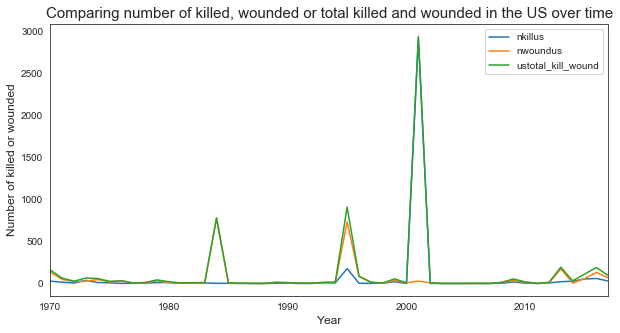

In [6]:
us_clt_time=df_us.groupby('iyear')[['nkillus','nwoundus','ustotal_kill_wound']].sum()
import matplotlib.pyplot as plt
ax = us_clt_time.plot(figsize = (10,5))
plt.legend()
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Number of killed or wounded', fontsize = 12)
ax.set_title('Comparing number of killed, wounded or total killed and wounded in the US over time',fontsize= 15)

In [7]:
#changing the width of barplot with hue
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#### 2.What are the states that are dangerous? Based on having the most number of attacks and the corresponding casualties.

In order to be more alert on how terrorist attacks cause severe casualties within boarders, in order to protect the citizens in our country, we decided to look at the quantities of multiple terrorist attacks and the number of U.S citizens died and wounded over the years.

In [8]:
us_inci=df_us[df_us['country_txt']=='United States'].groupby('provstate')[['nkillus','nwoundus','ustotal_kill_wound']].sum().reset_index().sort_values('ustotal_kill_wound',ascending=False)
us_stateCount = df_us['provstate'].value_counts().reset_index().rename({'provstate' : 'state_count'}, axis = 1)
us_state_attacks = pd.merge(left = us_inci, right = us_stateCount, left_on = 'provstate', right_on = 'index').drop('index', axis = 1)

In [36]:
us_state_attacks_1= us_state_attacks.sort_values(['state_count', 'ustotal_kill_wound'], ascending = [False, False])

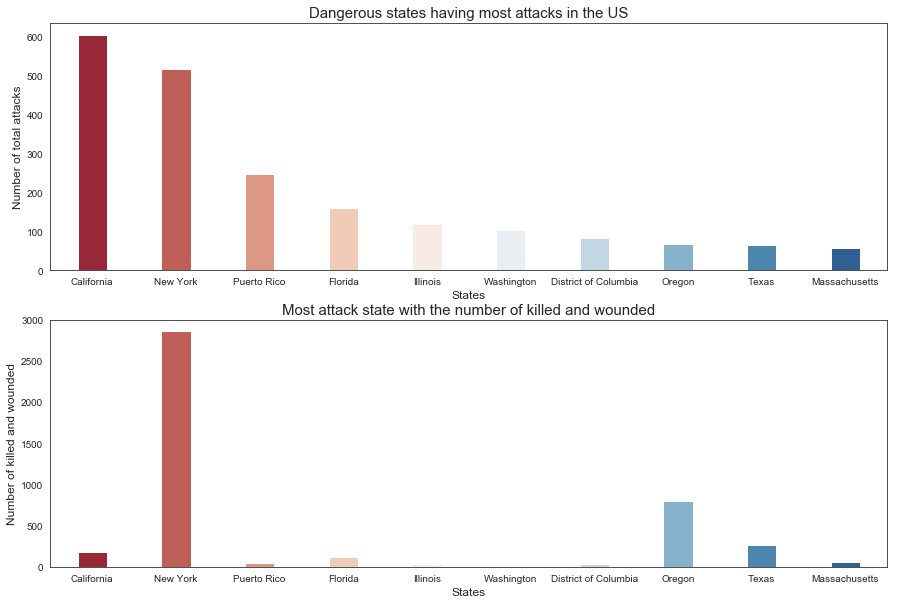

In [25]:
top10_us_state_attack = us_state_attacks_1.iloc[:10]
#Compare top10 terror groups which attacks the most to top10 terror groups causes the most number of killed and wounded
fig, ax = plt.subplots(2, 1, figsize=(15,10))
#top10 terror groups which attacks the most
sns.barplot(x = "provstate",y = "state_count", data = top10_us_state_attack, palette = "RdBu", ax=ax[0])
ax[0].set_xlabel('States', fontsize = 12)
ax[0].set_ylabel('Number of total attacks', fontsize = 12)
ax[0].set_title("Dangerous states having most attacks in the US",fontsize= 15)
change_width(ax[0], .35)
#top10 terror groups causes the most number of killed and wounded
sns.barplot(x = 'provstate',y = 'ustotal_kill_wound', data = top10_us_state_attack, palette = "RdBu", ax=ax[1])
ax[1].set_xlabel("States", fontsize = 12)
ax[1].set_ylabel("Number of killed and wounded", fontsize = 12)
ax[1].set_title("Most attack state with the number of killed and wounded",fontsize= 15)
change_width(ax[1], .35)
# Adjust subplot
#plt.tight_layout()

In [30]:
df_us[df_us['provstate'] == 'California']['gname'].value_counts().head()

Unknown                              123
New World Liberation Front (NWLF)     82
Left-Wing Militants                   57
Chicano Liberation Front              31
Animal Liberation Front (ALF)         27
Name: gname, dtype: int64

As we can see California had a lot of attacks over the years, but the number of casualties are relatively small.<br>
This indicates that the main goal of attacks might not be killing people, it might be having some kind of protests. <br>
By looking at the terror groups of California, we found out the most of the perpetrator groups are 'Unknown'. <br> Excluding the 'Unknown' group, most of the terror attack groups are based on in California are usually launched by residents in state or US. <br>

On the contrary, New York state had a large number of attacks and casualties over the year. <br>
From the map we've showned before, 9/11 was the the main reason that cause the high number of killed and wounded in New York, apart from that, New York state is still on high alert.

#### 3. Analysis the terrorist goups cause the most casualties in U.S

More, we should be more concern about terror groups in the world that causes a LOT of troubles in America. <br>

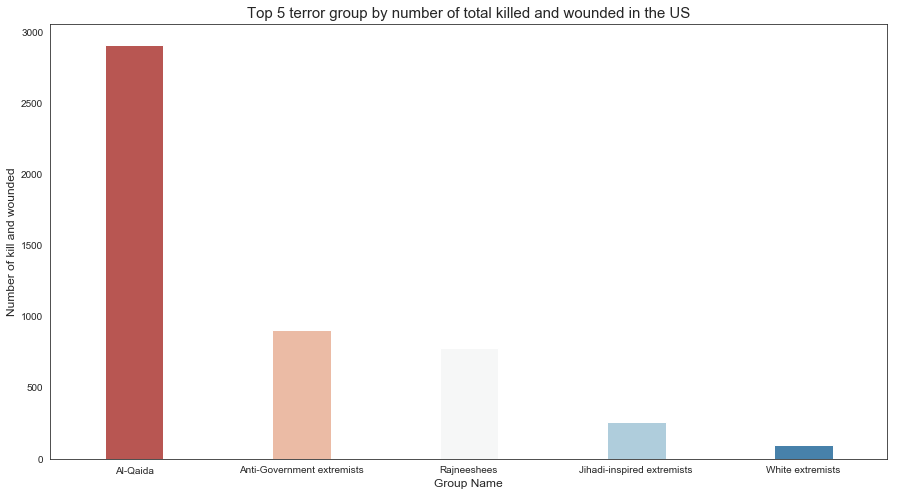

In [11]:
# The top5 most popular terror groups in US 
gname_kill = df_us.groupby(df_us[df_us['gname'] != 'Unknown']['gname'])['nkillus','nwoundus','ustotal_kill_wound'].sum().sort_values(by = 'ustotal_kill_wound', ascending = False).reset_index()
top_5_gname_kill = gname_kill.iloc[:5]
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'gname',y = 'ustotal_kill_wound', data = top_5_gname_kill,palette = "RdBu")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Group Name", fontsize = 12)
plt.ylabel("Number of kill and wounded", fontsize = 12)
plt.title("Top 5 terror group by number of total killed and wounded in the US",fontsize= 15)
change_width(ax, .35)
plt.show()

In [35]:
df_us[df_us['gname'] == 'Anti-Government extremists']['provstate'].value_counts()

Nebraska                7
Texas                   5
Iowa                    4
Illinois                3
Nevada                  3
California              3
District of Columbia    2
Colorado                2
Louisiana               1
Oklahoma                1
West Virginia           1
Virginia                1
Indiana                 1
Pennsylvania            1
Michigan                1
Name: provstate, dtype: int64

As we found out, 'Al-Qaida', which is the main terror group that launched the 9/11 attack causes a lot of death. <br>
The group 'Rajneeshees' is also a famous group for the bioterror attack in Oregon. 

### The typical attack type ,target type and weapon used from these group:
* pivot(gname, attacktype1_txt)
* pivot(gname,targtype1_txt)
* pivot(gname,weaptype1_txt)

#### 4. What are the terroist motivation?

To reduce the possible terror attacks in the US and have a pre-emptive strike, we decided to look at the terrorist motivation from the text provided. <br>
We can see 'Muslim' and 'Protest' are the important keyword here, this can give us more clues on how the attacks were formed.

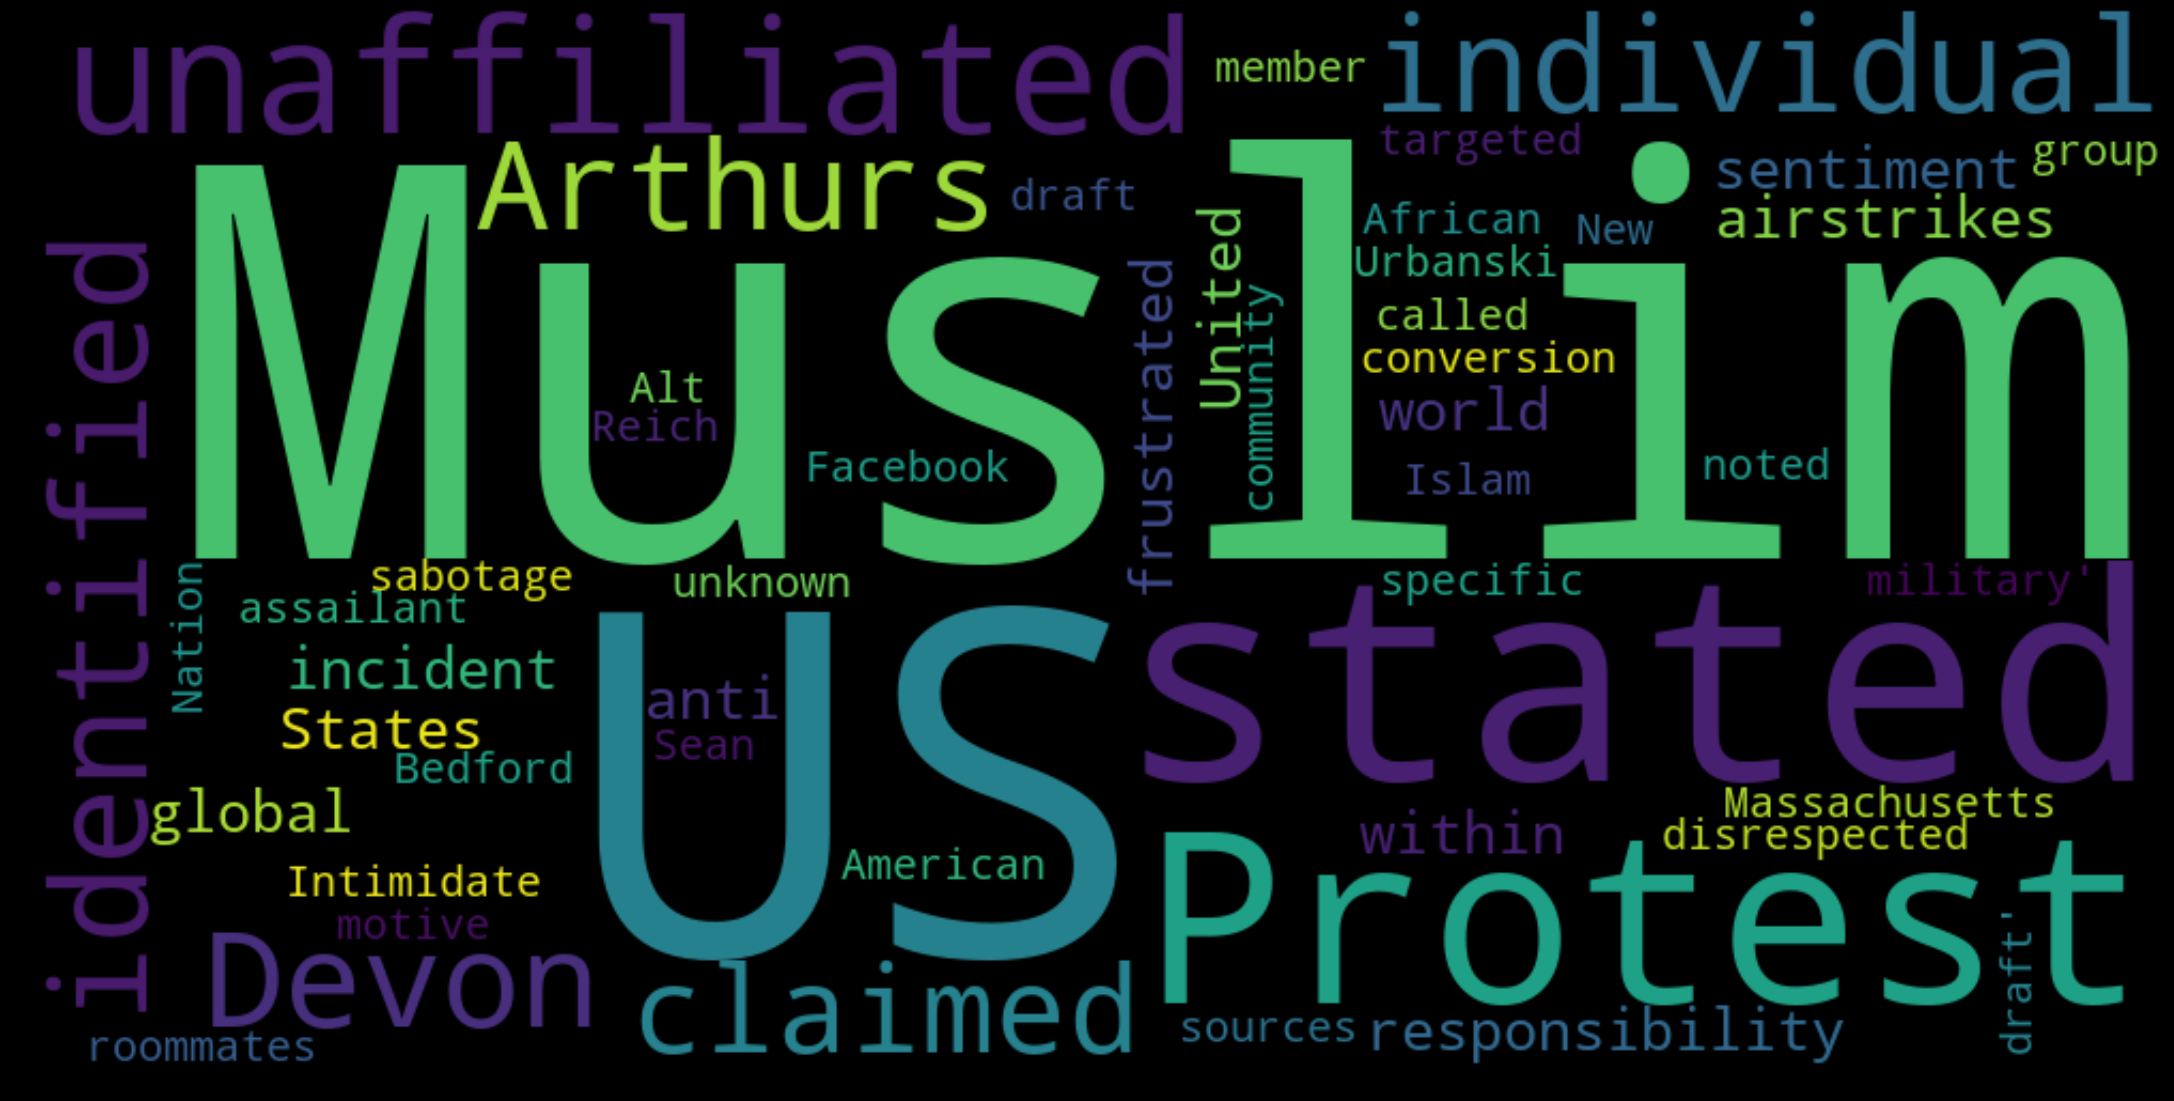

In [12]:
#Create a wordcloud of the terror attacks motive
from wordcloud import WordCloud
df_us_motive = df_us['motive'].dropna()
text = df_us_motive.values
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black').generate(str(text))

fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
df_all.head()

,iyear,imonth,iday,extended,resolution,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,motive,guncertain1,individual,nperps,nperpcap,claimmode_txt,compclaim,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,attacktype1_txt,attacktype2_txt,attacktype3_txt,multiattacktype,attacktype_count,attacktype,targtype1_txt,targsubtype1_txt,targtype2_txt,targsubtype2_txt,targtype3_txt,targsubtype3_txt,multitargtype,targtype_count,multitargsubtype,targsubtype_count,targettype,target1,target2,target3,multitarget,target_count,target,corp1,corp2,corp3,multicorp,corp_count,corp,natlty1_txt,natlty2_txt,natlty3_txt,natlty,gname,gname2,gname3,multigroup,group_count,claimed,claim2,claim3,total_claim,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,multiweaptype,multiweapsubtype,weaptype_count,weapsubtype_count,weapontype,total_kill_wound,ustotal_kill_wound,pertotal_kill_wound,IncomeGroup,GDP
0,1970,7,2,0,NaN,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1.0,0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,PGIS,0,0,0,0,Assassination,NaN,NaN,0,1,Assassination,Private Citizens & Property,Named Civilian,NaN,NaN,NaN,NaN,0,1,0,1,Private Citizens & Property|Named Civilian,Julio Guzman,NaN,NaN,0,1,Julio Guzman,NaN,NaN,NaN,0,0,NaN,Dominican Republic,NaN,NaN,Dominican Republic,MANO-D,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Unknown,1.0,0.0,0.0,Upper middle income,1.485500e+09
1,1970,7,26,0,NaN,United States,North America,Wisconsin,Sparta,43.939135,-90.820369,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1.0,0,NaN,0.0,0,3.0,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,PGIS,0,0,0,0,Bombing/Explosion,NaN,NaN,0,1,Bombing/Explosion,Utilities,Electricity,NaN,NaN,NaN,NaN,0,1,0,1,Utilities|Electricity,electric power substation,NaN,NaN,0,1,electric power substation,NaN,NaN,NaN,0,0,NaN,United States,NaN,NaN,United States,American Servicemen's Union (ASU),NaN,NaN,0,1,0.0,0.0,0.0,0.0,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.075884e+12
2,1970,7,26,0,NaN,United States,North America,Wisconsin,Sparta,43.939135,-90.820369,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1.0,0,NaN,0.0,0,3.0,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,PGIS,0,0,0,0,Bombing/Explosion,NaN,NaN,0,1,Bombing/Explosion,Telecommunication,Telephone/Telegraph,NaN,NaN,NaN,NaN,0,1,0,1,Telecommunication|Telephone/Telegraph,telephone exchange,NaN,NaN,0,1,telephone exchange,NaN,NaN,NaN,0,0,NaN,United States,NaN,NaN,United States,American Servicemen's Union (ASU),NaN,NaN,0,1,0.0,0.0,0.0,0.0,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.075884e+12
3,1970,7,27,0,NaN,United States,North America,California,San Francisco,37.755363,-122.443352,1.0,0,NaN,"7/27/1970: In a series of related attack, unkn...",1,1,1,0.0,1.0,1.0,0,NaN,0.0,0,-99.0,-99.0,NaN,NaN,Bomb with timing device,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Five inch hole in the office of the commanding...,0.0,0.0,Hewitt Project,-9,-9,0,-9,Bombing/Explosion,NaN,NaN,0,1,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,NaN,NaN,NaN,NaN,0,1,0,1,Military|Military Barracks/Base/Headquarters/C...,"Armed Forces Police Headquarters, San Francisco",NaN,NaN,0,1,"Armed Forces Police Headquarters, San Francisco",Armed Forces Police,NaN,NaN,0,1,Armed Forces Police,United States,NaN,NaN,United States,Left-Wing Militants,NaN,NaN,0,1,0.0,0.0,0.0,0.0,Explosives,Time Fuse,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,Explosives|Time Fuse,0.0,

In [57]:
pd.set_option('display.max_column', 150)
#Create a more tidy dataframe for further analysis
remove_list = ['property','location','summary','doubtterr','attacktype1_txt','attacktype2_txt', 'attacktype3_txt','resolution','nperps','nperpcap','compclaim',
              'targtype1_txt','targtype2_txt', "targtype3_txt", 'targsubtype1_txt', 'targsubtype2_txt','targsubtype3_txt',
              'target1', 'target2', 'target3','corp1', 'corp2', 'corp3','natlty1_txt','natlty2_txt', 'natlty3_txt',
              'gname2', 'gname3','claimed', 'claim2','claim3', 'claimmode_txt',
              'weaptype1_txt','weaptype2_txt', 'weaptype3_txt','weaptype4_txt',
              'weapsubtype1_txt', 'weapsubtype2_txt', 'weapsubtype3_txt','weapsubtype4_txt',
              'nkill','nkillus','nkillter','nwound', 'nwoundus','nwoundte','propextent','propextent_txt',
              'propvalue','propcomment','INT_LOG','INT_IDEO','INT_MISC','INT_ANY']

In [58]:
df_all = df_all.drop(remove_list, axis = 1)

In [61]:
df_all.head(10)

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,multiple,success,suicide,motive,guncertain1,individual,weapdetail,ishostkid,ransom,dbsource,multiattacktype,attacktype_count,attacktype,multitargtype,targtype_count,multitargsubtype,targsubtype_count,targettype,multitarget,target_count,target,multicorp,corp_count,corp,natlty,gname,multigroup,group_count,total_claim,multiweaptype,multiweapsubtype,weaptype_count,weapsubtype_count,weapontype,total_kill_wound,ustotal_kill_wound,pertotal_kill_wound,IncomeGroup,GDP
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,1.0,0,NaN,0.0,0,NaN,0.0,0.0,PGIS,0,1,Assassination,0,1,0,1,Private Citizens & Property|Named Civilian,0,1,Julio Guzman,0,0,NaN,Dominican Republic,MANO-D,0,1,0.0,0,0,1,0,Unknown,1.0,0.0,0.0,Upper middle income,1.485500e+09
1,1970,7,26,0,United States,North America,Wisconsin,Sparta,43.939135,-90.820369,1.0,0,1,1,1,0.0,1.0,0,NaN,0.0,0,Explosive,0.0,0.0,PGIS,0,1,Bombing/Explosion,0,1,0,1,Utilities|Electricity,0,1,electric power substation,0,0,NaN,United States,American Servicemen's Union (ASU),0,1,0.0,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.075884e+12
2,1970,7,26,0,United States,North America,Wisconsin,Sparta,43.939135,-90.820369,1.0,0,1,1,1,0.0,1.0,0,NaN,0.0,0,Explosive,0.0,0.0,PGIS,0,1,Bombing/Explosion,0,1,0,1,Telecommunication|Telephone/Telegraph,0,1,telephone exchange,0,0,NaN,United States,American Servicemen's Union (ASU),0,1,0.0,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.075884e+12
3,1970,7,27,0,United States,North America,California,San Francisco,37.755363,-122.443352,1.0,0,1,1,1,1.0,1.0,0,NaN,0.0,0,Bomb with timing device,0.0,0.0,Hewitt Project,0,1,Bombing/Explosion,0,1,0,1,Military|Military Barracks/Base/Headquarters/C...,0,1,"Armed Forces Police Headquarters, San Francisco",0,1,Armed Forces Police,United States,Left-Wing Militants,0,1,0.0,0,0,1,1,Explosives|Time Fuse,0.0,0.0,0.0,High income,1.075884e+12
4,1970,7,27,0,United States,North America,California,San Francisco,37.755363,-122.443352,1.0,0,1,1,1,1.0,1.0,0,NaN,0.0,0,Two-inch pipe bomb,0.0,0.0,Hewitt Project,0,1,Bombing/Explosion,0,1,0,1,Military|Military Barracks/Base/Headquarters/C...,0,1,"Army Presidio, San Francisco",0,1,US Army,United States,Left-Wing Militants,0,1,0.0,0,0,1,1,Explosives|Pipe Bomb,0.0,0.0,0.0,High income,1.075884e+12
5,1970,7,28,1,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,1,1,1,0.0,1.0,0,NaN,0.0,0,NaN,1.0,1.0,PGIS,0,1,Hostage Taking (Kidnapping),0,1,0,1,Government (General)|Judge/Attorney/Court,0,1,"Dr. Daniel Pereira Manelli, judge",0,1,Uruguayan Government,Uruguay,Tupamaros (Uruguay),0,1,0.0,0,0,1,0,Unknown,0.0,0.0,0.0,High income,2.137097e+09
6,1970,7,28,0,United States,North America,Texas,Houston,29.813822,-95.365295,1.0,0,1,1,1,0.0,1.0,0,NaN,0.0,0,Explosive,0.0,0.0,PGIS,0,1,Bombing/Explosion,0,1,0,1,Business|Medical/Pharmaceutical,0,1,Associated Testing Labs Inc.,0,0,NaN,United States,Unknown,0,1,0.0,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.075884e+12
7,1970,7,26,0,United States,North America,Wisconsin,Sparta,43.939135,-90.820369,1.0,0,1,1,0,0.0,1.0,0,NaN,0.0,0,Explosive,0.0,0.0,PGIS,0,1,Bombing/Explosion,0,1,0,1,Military|Military Barracks/Base/Headquarters/C...,0,1,Camp McCoy,0,0,NaN,United States,American Servicemen's Union (ASU),0,1,0.0,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.075884e+12
8,1970,7,27,0,United States,North America,New York,New York City,40.697132,-73.931351,1.0,0,1,1,1,0.0,1.0,0,NaN,0.0,0,Explosive,0.0,0.0,PGIS,0,1,Bombing/Explosion,0,1,0,1,Business|Bank/Commerce,0,1,"Bank of America, wall st. office",0,1,Bank of America,United States,"Weather Underground, Weathermen",0,1,0.0,0,0,1,1,Explosives|Unknown Explosive Type,0.0,0.0,0.0,High income,1.075884e+12
9,1970,7,28,0,Spain,Western Europe,Navarre,P